In [ ]:
import cv2
import pytesseract
import os
import numpy as np
from IPython.display import Image, display
import tempfile
from paddleocr import PaddleOCR
ocr = PaddleOCR()



In [95]:
import os

folder_path = "images/"
image_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".tiff"}
image_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in image_extensions]

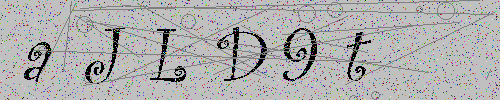

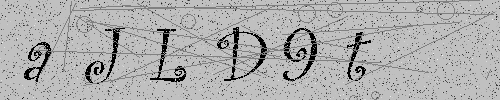

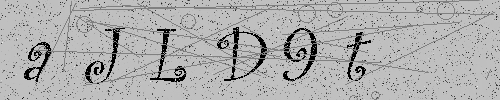

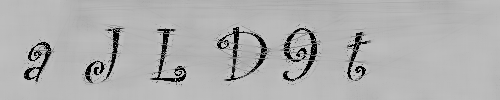

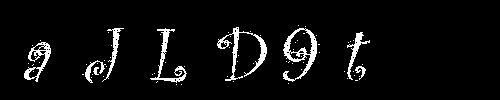

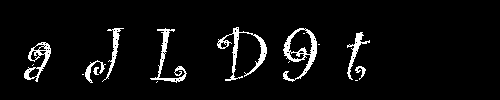

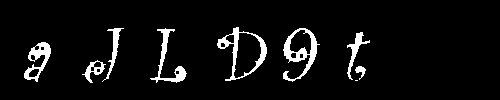

[2025/01/26 14:45:27] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: adILDOt

Extracted CAPTCHA Text Using paddleocr: [[('LD9t', 0.6835679411888123)]]


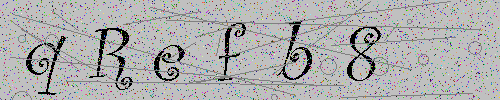

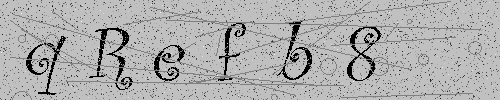

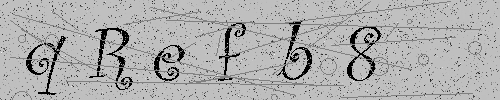

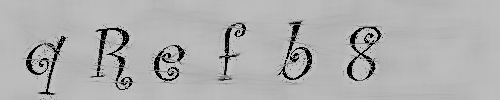

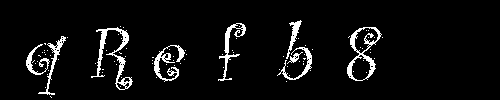

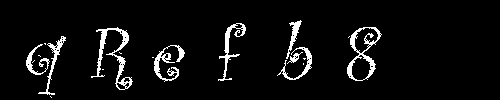

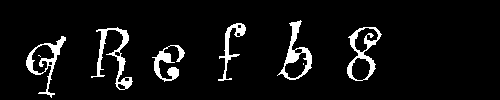

[2025/01/26 14:45:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: gRefb8S

Extracted CAPTCHA Text Using paddleocr: [[('qRefb８', 0.8013496398925781)]]


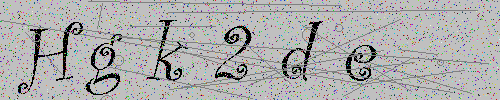

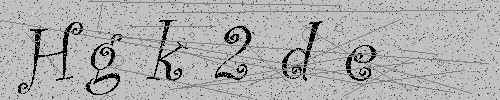

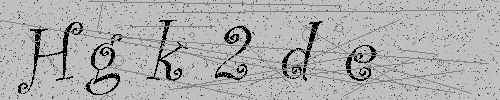

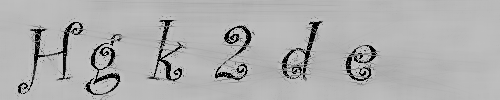

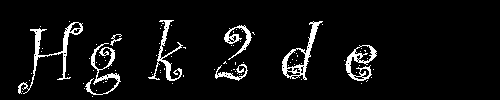

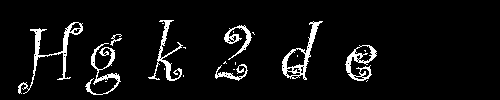

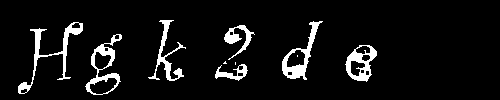

[2025/01/26 14:45:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: Hek2de

Extracted CAPTCHA Text Using paddleocr: [[('Hgk2de', 0.9748840928077698)]]


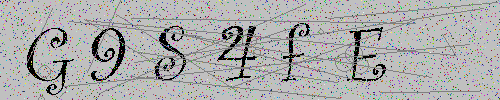

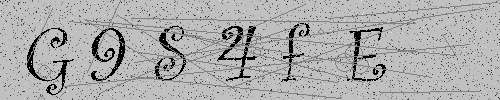

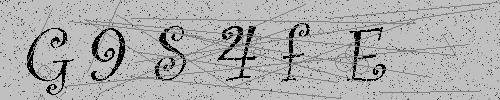

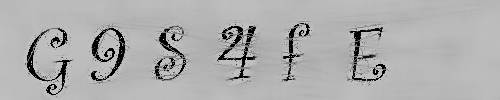

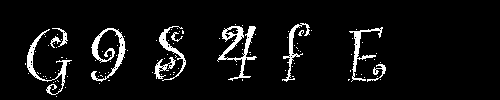

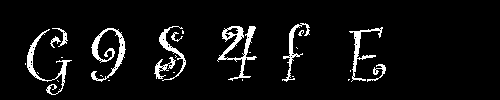

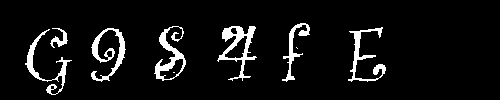

[2025/01/26 14:45:30] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: GOS4AFE

Extracted CAPTCHA Text Using paddleocr: [[('G9S4fE ', 0.8560262322425842)]]


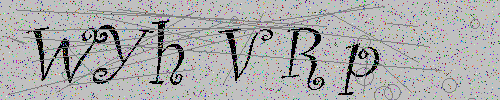

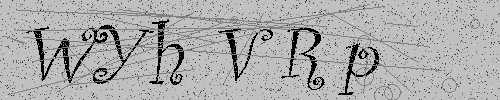

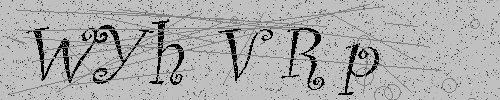

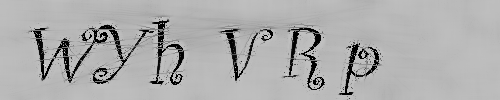

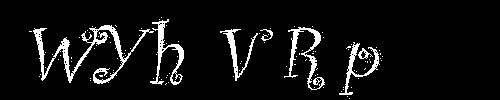

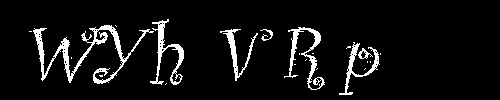

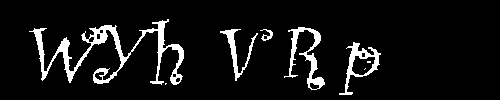

[2025/01/26 14:45:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: WYhVRp

Extracted CAPTCHA Text Using paddleocr: [[('Wyh VBp', 0.7586203813552856)]]


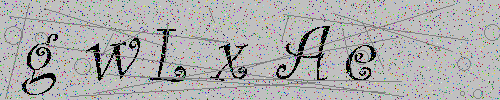

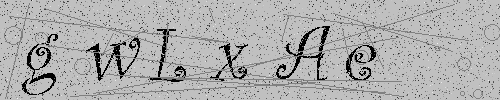

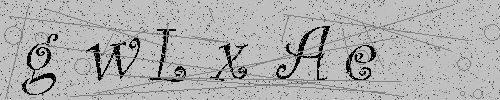

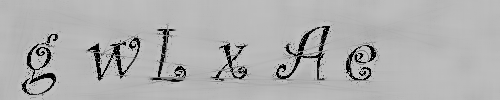

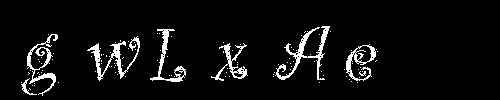

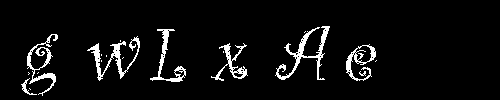

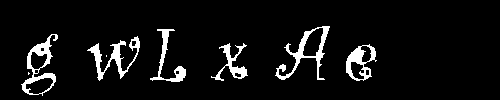

[2025/01/26 14:45:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: gwhxAe

Extracted CAPTCHA Text Using paddleocr: [[('gwLxAe.', 0.838638186454773)]]


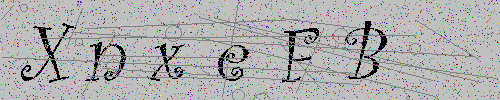

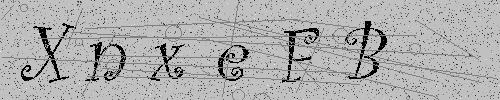

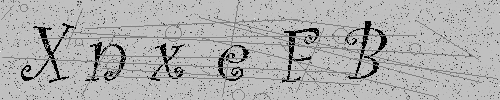

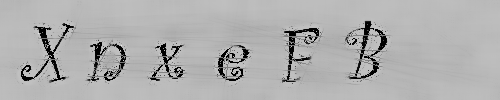

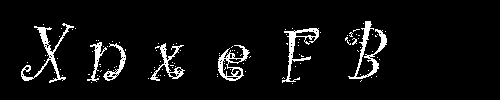

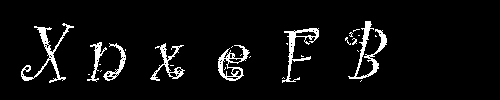

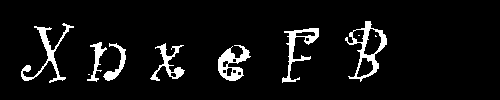

[2025/01/26 14:45:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: XpoxeFPR

Extracted CAPTCHA Text Using paddleocr: [[('XnxeEB', 0.7866812348365784)]]


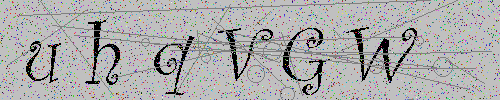

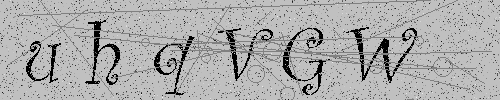

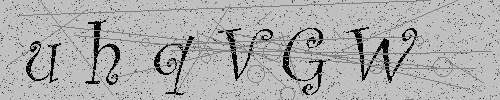

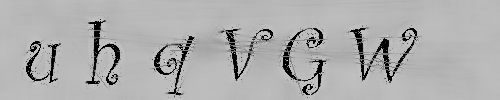

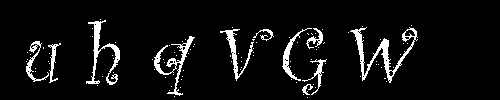

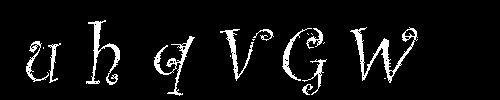

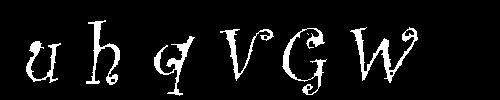

[2025/01/26 14:45:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: ahdVGW

Extracted CAPTCHA Text Using paddleocr: [[('uhqvgw', 0.9032402038574219)]]


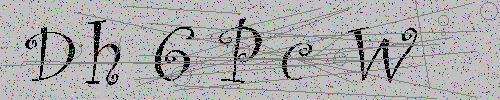

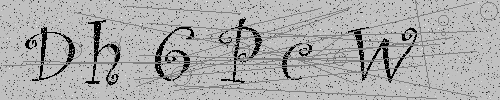

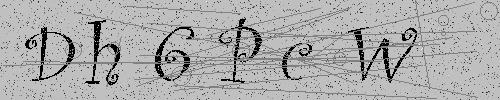

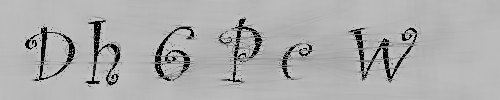

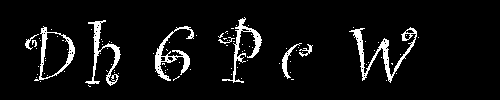

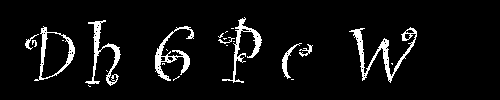

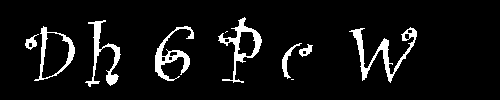

[2025/01/26 14:45:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: DhePew

Extracted CAPTCHA Text Using paddleocr: [[('Dh6pw', 0.8615080118179321)]]


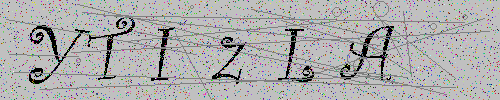

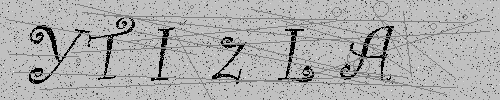

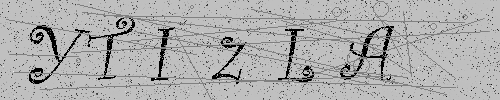

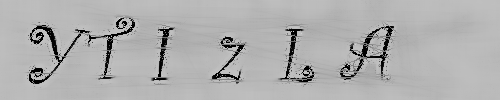

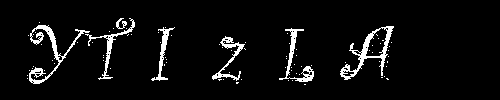

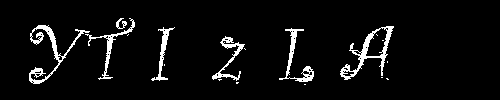

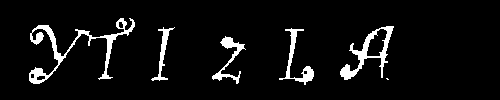

[2025/01/26 14:45:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: MTIZLA

Extracted CAPTCHA Text Using paddleocr: [[('yTIzLA', 0.7591292858123779)]]


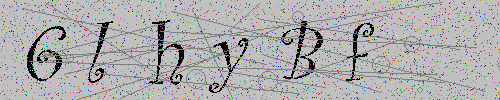

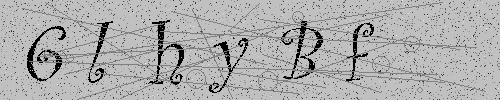

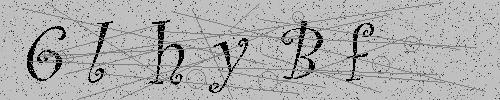

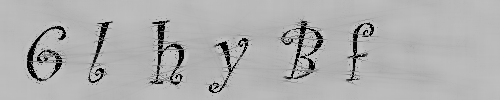

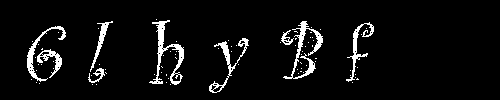

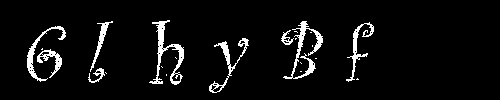

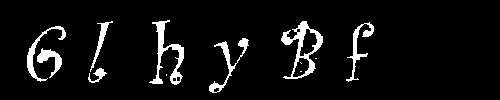

[2025/01/26 14:45:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: 6lhyPf

Extracted CAPTCHA Text Using paddleocr: [[('6lhyBf', 0.8845174312591553)]]


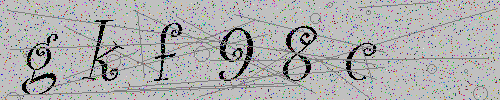

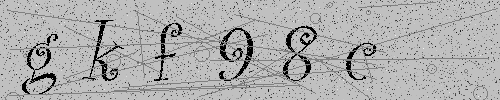

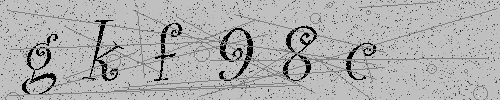

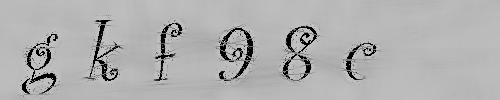

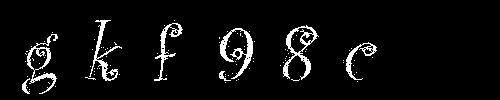

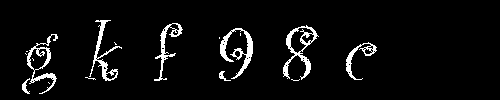

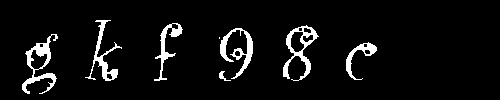

[2025/01/26 14:45:37] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: gkf98e

Extracted CAPTCHA Text Using paddleocr: [[('gkf98', 0.911961555480957)]]


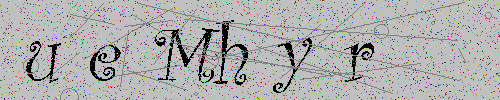

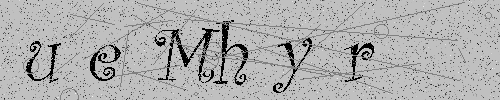

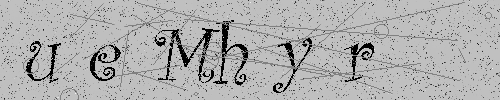

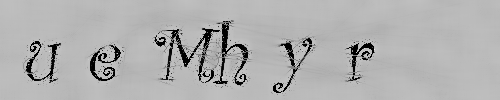

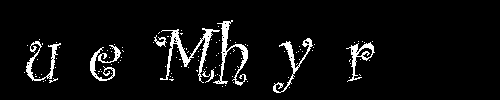

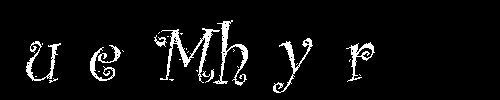

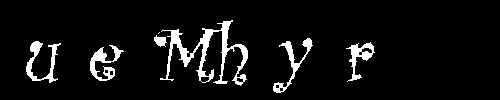

[2025/01/26 14:45:38] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: aeMbhyr

Extracted CAPTCHA Text Using paddleocr: [[('ue Mh y r', 0.8438447117805481)]]


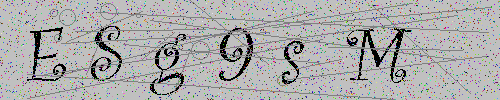

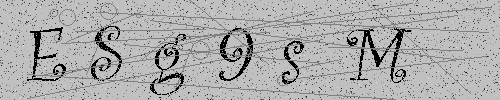

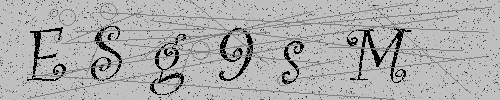

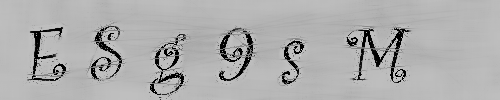

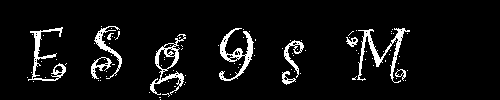

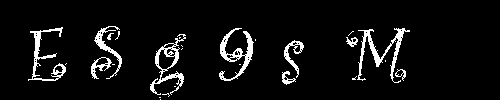

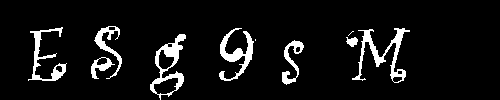

[2025/01/26 14:45:39] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: BS9sM

Extracted CAPTCHA Text Using paddleocr: [[('ESg9sM ', 0.8151547312736511)]]


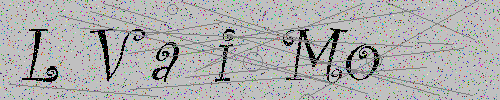

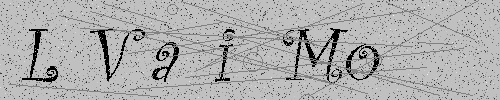

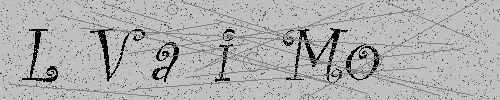

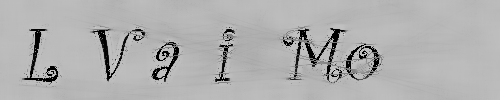

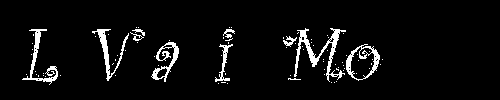

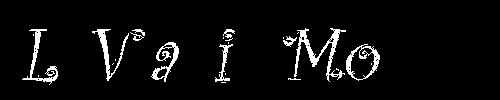

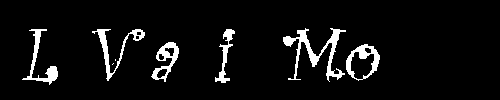

[2025/01/26 14:45:40] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
Extracted CAPTCHA Text Using Teserrect: LVeiMo

Extracted CAPTCHA Text Using paddleocr: [[('L Va i Mo.', 0.9385988116264343)]]


In [100]:

for image_file in image_files:
    image = cv2.imread("images/" + image_file)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ### 1st image
    cv2.imwrite(temp_file.name, image)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))


    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ### 1st image
    cv2.imwrite(temp_file.name, gray)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))

    # Apply fastNlMeansDenoising
    denoised_Stage1 = cv2.fastNlMeansDenoising(gray, h=10, templateWindowSize=4, searchWindowSize=21)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ### 1st image
    cv2.imwrite(temp_file.name, denoised_Stage1)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))
    denoised_Stage2 = cv2.fastNlMeansDenoising(denoised_Stage1,None, 31, 12, 21)
    #without adding None instead of dst
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ##### 2nd image
    cv2.imwrite(temp_file.name, denoised_Stage2)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))  

    denoised_Stage3 = cv2.fastNlMeansDenoising(denoised_Stage2, h=10, templateWindowSize=6, searchWindowSize=21)
    # Step 3: Apply binary thresholding

    _, binary = cv2.threshold(denoised_Stage3, 128, 255, cv2.THRESH_BINARY_INV)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ##### 2nd image
    cv2.imwrite(temp_file.name, binary)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))

    # Custom function to remove isolated pixels
    def remove_isolated_pixels(binary_image):
        h, w = binary_image.shape
        cleaned_image = binary_image.copy()
        
        for i in range(1, h - 1):  # Exclude borders
            for j in range(1, w - 1):
                # Check the 8-connected neighborhood
                neighborhood = binary_image[i-1:i+2, j-1:j+2]
                if binary_image[i, j] == 255 and np.sum(neighborhood) <= 255:
                    cleaned_image[i, j] = 0  # Remove the isolated pixel
        return cleaned_image

    # Apply to binary image
    cleaned_image = remove_isolated_pixels(binary)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ##### 2nd image
    cv2.imwrite(temp_file.name, cleaned_image)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))

    # Define a small kernel
    kernel = np.ones((3, 3), np.uint8)

    # Apply morphological closing
    cleaned_image1 = cv2.morphologyEx(cleaned_image, cv2.MORPH_CLOSE, kernel)
    temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False) ##### 2nd image
    cv2.imwrite(temp_file.name, cleaned_image1)
    # Display the image in the notebook
    display(Image(filename=temp_file.name))
    #################################

    # Step 4: Set up pytesseract configuration to extract letters and digits
    custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'

    # Step 5: Perform OCR to extract text from the processed image
    pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    extracted_text = pytesseract.image_to_string(cleaned_image1, config=custom_config)
    results = ocr.ocr(cleaned_image1, det=False)
    # Output the extracted text
    print("Extracted CAPTCHA Text Using Teserrect:", extracted_text)
    print("Extracted CAPTCHA Text Using paddleocr:", results)
    #######################



In [ ]:
from paddleocr import PaddleOCR

# Initialize the PaddleOCR model


# Perform OCR
results = ocr.ocr(cleaned_image, det=False)

results


[2025/01/26 14:09:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\parth/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\parth/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

[[('3rAo!p', 0.6163549423217773)]]

In [78]:
pip install paddleocr paddlepaddle


     ---------------------------------------- 0.0/87.2 kB ? eta -:--:--
     ---------------------------------------- 87.2/87.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/544.7 kB ? eta -:--:--
   ------------------ --------------------- 256.0/544.7 kB 7.9 MB/s eta 0:00:01
   -------------------------------------- - 522.2/544.7 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 544.7/544.7 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/161.9 kB ? eta -:--:--
   --------------------------------------- 161.9/161.9 kB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/81.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/81.1 MB 8.7 MB/s eta 0:00:10
   ---------------------------------------- 0.8/81.1 MB 8.7 MB/s eta 0:00:10
    --------------------------------------- 1.3/81.1 MB 8.2 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
